In [1]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from seaborn._core.moves import Rolling
# from seaborn._marks._line_labels import LineLabel

In [2]:
print(sns.__version__)

0.14.0.dev0_


In [3]:
# Parameters for simulation
game = "ExampleGame"
agents = ["Agent1", "Agent2", "Agent3"]
num_iterations = 200
num_agents = len(agents)

# Create a simulated DataFrame
np.random.seed(0)  # For reproducible results
data = {
    "Game": [game] * num_iterations * num_agents,
    "Episodic Return": np.random.rand(num_iterations * num_agents)
    * 100,  # Random performance metric
    "Iteration": list(range(num_iterations)) * num_agents,
    "Agent": np.repeat(agents, num_iterations),
}

df = pd.DataFrame(data)

# Filtering for a specific game - in this case, it's redundant as we only have one game
fd_data = df.query(f'Game == "{game}"')

print(fd_data)

            Game  Episodic Return  Iteration   Agent
0    ExampleGame        54.881350          0  Agent1
1    ExampleGame        71.518937          1  Agent1
2    ExampleGame        60.276338          2  Agent1
3    ExampleGame        54.488318          3  Agent1
4    ExampleGame        42.365480          4  Agent1
..           ...              ...        ...     ...
595  ExampleGame        99.796225        195  Agent3
596  ExampleGame        36.218906        196  Agent3
597  ExampleGame        47.064895        197  Agent3
598  ExampleGame        37.824517        198  Agent3
599  ExampleGame        97.952693        199  Agent3

[600 rows x 4 columns]


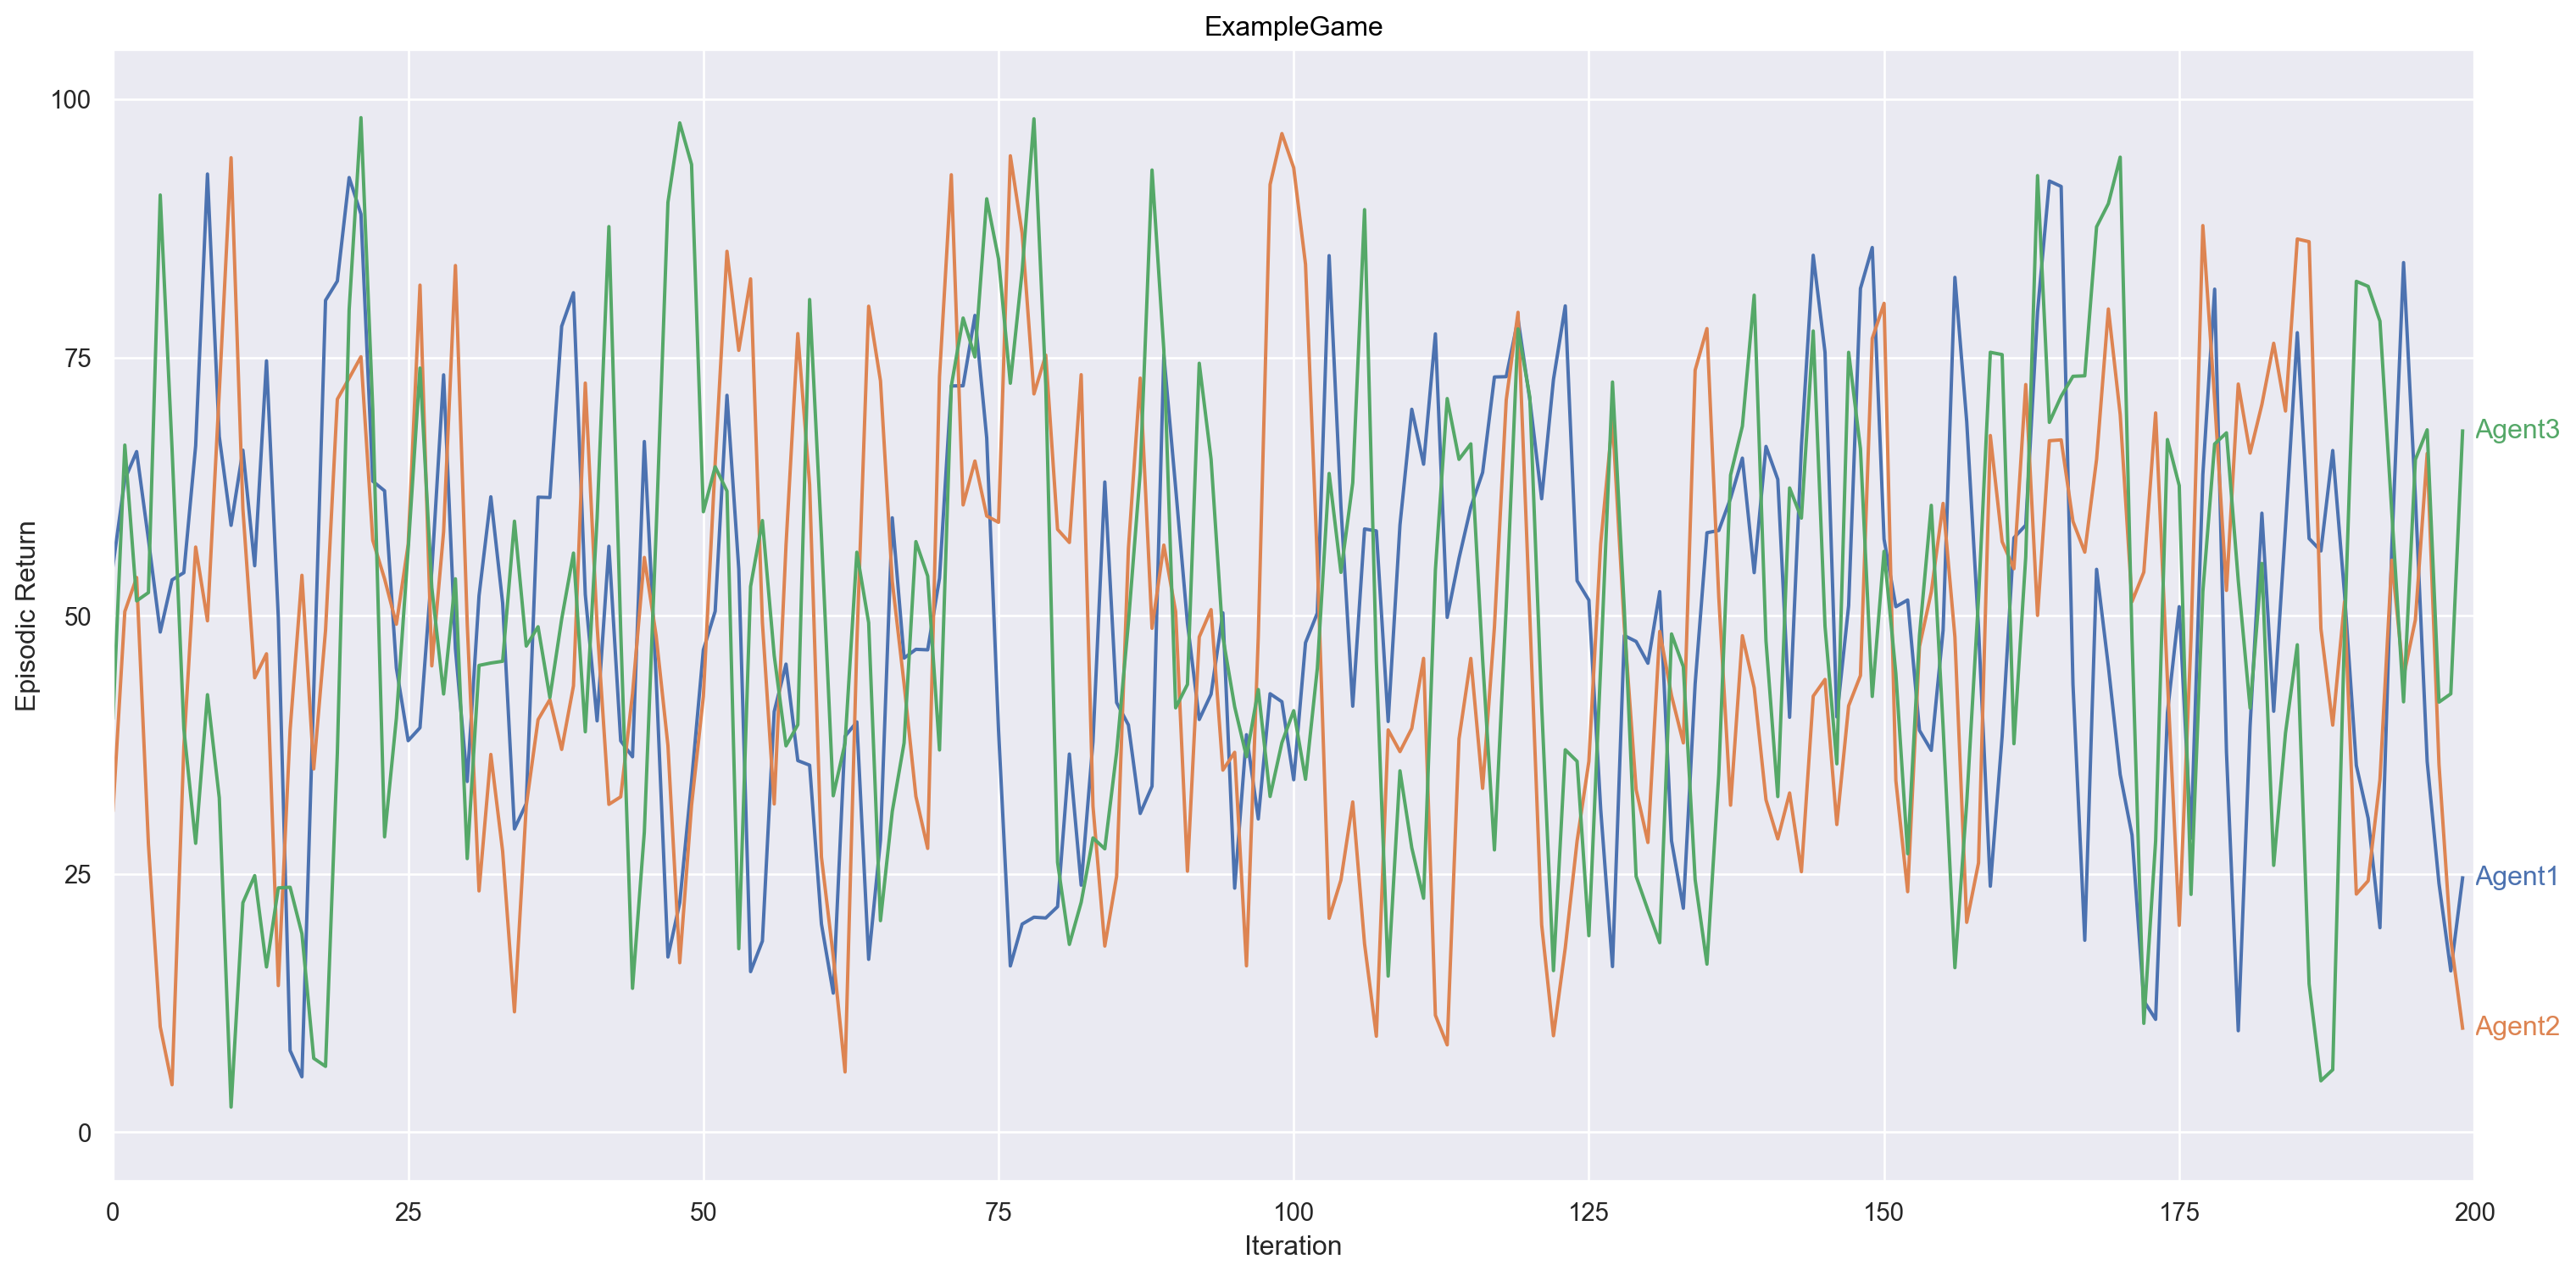

In [4]:
theme = "darkgrid"
game = "ExampleGame"

(
    fd_data.query(f'`Game` == "{game}"')
    .pipe(so.Plot, y="Episodic Return", x="Iteration", color="Agent", text="Agent")
    .layout(size=(16, 8))
    #.theme(theme)
    .facet("Game")
    .limit(x=(0, 200))
    .scale(
        x=so.Continuous().tick(at=list(range(0, 201, 25))),
        y=so.Continuous().tick(upto=5).label(like="{x:,.0f}"),
    )
    .add(
        so.Lines(),
        so.Agg(),
        so.Rolling(window_type="gaussian", window_kwargs={"std": 2}),
        legend=False,
    )
    # This will be much easier when compound marks are implemented.
    # Will be able to do so.Line() + LineLabel().
    .add(
        so.LineLabel(offset=5),
        so.Agg(),
        so.Rolling(window_type="gaussian", window_kwargs={"std": 2}),
        legend=False,
    )
    .add(so.Band(), so.Est(errorbar="se"), legend=False)
)